In [2]:
import pandas as pd
import re
import io

def extract_masses(line_string):
    """
    Extracts the two floating-point mass values from the 'line' string.

    The string format is assumed to be:
    "[fragment_info] @ mass_1 & [fragment_info] @ mass_2"

    It uses a regular expression to find two instances of a floating-point
    number that follows an '@' symbol, which are separated by an '&' symbol.

    Args:
        line_string (str): The string from the 'line' column containing mass data.

    Returns:
        list: A list containing two floats [mass_1, mass_2].
              Returns [None, None] if fewer than two masses are found.
    """
    if pd.isna(line_string):
        return [None, None]

    # Regular Expression Pattern:
    # 1. @\s* -> Matches '@' followed by any number of whitespace characters
    # 2. ([\d\.]+) -> Captures one or more digits or dots (the floating-point number)
    # 3. (?:.*?)   -> Non-capturing group matching any character non-greedily (to find the next @)
    # The pattern is run twice (find all) to capture the first two matches.
    matches = re.findall(r'@\s*([\d\.]+)', line_string)

    if len(matches) >= 2:
        # Convert captured strings to floats
        try:
            mass_1 = float(matches[0])
            mass_2 = float(matches[1])
            return [mass_1, mass_2]
        except ValueError:
            # Handle cases where the captured string wasn't a valid float
            print(f"Warning: Could not convert mass strings to float in line: {line_string}")
            return [None, None]
    else:
        # Handle cases where only one or zero masses were found
        return [None, None]


# --- Simulation of CSV Import ---


# Use io.StringIO to read the string data as if it were a file
df = pd.read_csv('data/data_classification/classified_msms_data7.csv')

# --- Data Extraction and DataFrame Update ---

# 1. Apply the function to the 'line' column. This results in a Series
#    where each element is a list: [mass_1, mass_2].
extracted_masses = df['line'].apply(extract_masses)

# 2. Use pd.Series to split the list of two values into two new, temporary columns.
#    Then assign these temporary columns directly to the DataFrame.
df[['mass_1', 'mass_2']] = extracted_masses.apply(pd.Series)

# 3. Convert the newly created columns to the float data type (they are objects/strings initially)
df['mass_1'] = pd.to_numeric(df['mass_1'], errors='coerce')
df['mass_2'] = pd.to_numeric(df['mass_2'], errors='coerce')

In [3]:
aa_mass = {
    "G": 57,
    "A": 71,
    "S": 87,
    "P": 97,
    "V": 99,
    "T": 101,
    "C": 103,
    "I": 113,
    "L": 113,
    "N": 114,
    "D": 115,
    "K": 128,
    "Q": 128,
    "E": 129,
    "M": 131,
    "H": 137,
    "F": 147,
    "R": 156,
    "Y": 163,
    "W": 186
}

In [4]:
df['sum'] = df['mass_1'] + df['mass_2']
df = df.sort_values('sum', ascending=False)
df['sum_cleared'] = df['sum'] - 14 - 18 - 1
df = df[:-1]
#df['sum_cleared'] = df['sum_cleared'].astype('int')
df


,n,classification,line,mass_1,mass_2,sum,sum_cleared
2,3,usable,y7 (1+) @ 784.38 & b3 (1+) @ 469.1,784.38,469.10,1253.48,1220.48
31,32,usable,y8 (1+) @ 965.41 & b2 (1+) @ 287.94,965.41,287.94,1253.35,1220.35
3,4,usable,y4 (1+) @ 511.14 & b6 (1+) @ 742.16,511.14,742.16,1253.30,1220.30
0,1,usable,y5 (1+) @ 568.12 & b5 (1+) @ 685.12,568.12,685.12,1253.24,1220.24
1,2,usable,y6 (1+) @ 671.16 & b4 (1+) @ 582.03,671.16,582.03,1253.19,1220.19
5,6,usable,y3 (1+) @ 410.06 & b7 (1+) @ 843.07,410.06,843.07,1253.13,1220.13
13,14,usable,y2 (1+) @ 310.82 & b8 (1+) @ 941.96,310.82,941.96,1252.78,1219.78
35,36,usable,y1 (1+) @ 181.38 & b9 (1+) @ 1071.1,181.38,1071.10,1252.48,1219.48
10,11,usable,[y8-NH3] (1+) @ 949.32 & b2 (1+) @ 287.66,949.32,287.66,1236.98,1203.98
12,13,usable,[y7-NH3] (1+) @ 766.69 & b3 (1+) @ 469.17,766.69,469.17,1235.86,1202.86


In [5]:
the_peptide = 'GGNFSGRGGFGGSR'
def get_peptide_mass(pep):
    mass = 0
    for i in pep:
        mass += aa_mass[i]
    return mass

In [6]:
def is_close(threshold, obj, point):
    if abs(obj - point) <= threshold:
        return True
    else:
        return False

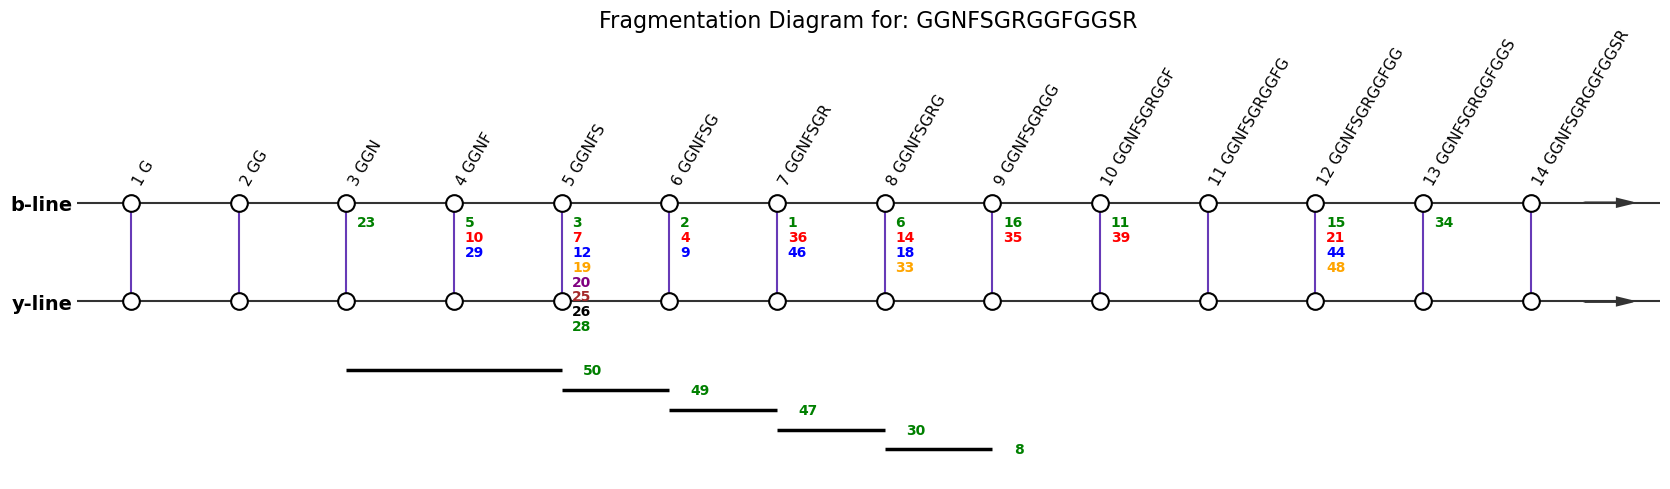

In [7]:
import matplotlib.pyplot as plt
import re

def parse_sequence(sequence):
    """
    Parses a peptide sequence that may contain modified residues.
    """
    residues = re.findall('[A-Z][a-z]*', sequence)
    return residues

def generate_b_ion_fragments(residues):
    """
    Generates a list of cumulative b-ion fragment sequences from the N-terminus.
    """
    fragments = []
    current_fragment = ""
    for residue in residues:
        current_fragment += residue
        fragments.append(current_fragment)
    return fragments

def plot_peptide_fragmentation(sequence, annotations=None, internal_peptides=None, show=True, save_path=None):
    """
    Generates and displays a visualization of peptide fragmentation.

    Args:
        sequence (str): The peptide sequence to visualize.
        annotations (list of lists, optional): Annotations for the vertical lines.
        internal_peptides (list of tuples, optional): Data for internal peptide lines.
                                                      Format: [(start, end, label), ...].
                                                      Defaults to None.
        show (bool): Whether to display the plot.
        save_path (str, optional): Path to save the figure.
    """
    residues = parse_sequence(sequence)
    b_ion_fragments = generate_b_ion_fragments(residues)
    num_fragments = len(residues)

    annotation_colors = ['green', 'red', 'blue', 'orange', 'purple', 'brown', 'black']

    fig, ax = plt.subplots(figsize=(max(12, num_fragments * 1.2), 5))
    y_b_line = 1.0
    y_y_line = 0.0
    line_color = '#333333'
    line_width = 1.5

    ax.axhline(y=y_b_line, color=line_color, lw=line_width, zorder=1)
    ax.axhline(y=y_y_line, color=line_color, lw=line_width, zorder=1)
    arrow_length = 0.3
    ax.arrow(num_fragments + 0.5, y_b_line, arrow_length, 0,
             head_width=0.08, head_length=0.15, fc=line_color, ec=line_color, lw=line_width, zorder=1)
    ax.arrow(num_fragments + 0.5, y_y_line, arrow_length, 0,
             head_width=0.08, head_length=0.15, fc=line_color, ec=line_color, lw=line_width, zorder=1)

    for i, fragment in enumerate(b_ion_fragments):
        x_pos = i + 1
        ax.plot([x_pos, x_pos], [y_y_line, y_b_line], color='#673ab7', lw=1.5, zorder=2)
        ax.plot(x_pos, y_b_line, 'o', ms=12, markerfacecolor='white', markeredgecolor='black', markeredgewidth=1.5, zorder=3)
        ax.plot(x_pos, y_y_line, 'o', ms=12, markerfacecolor='white', markeredgecolor='black', markeredgewidth=1.5, zorder=3)
        label_text = f"{i+1} {fragment}"
        ax.text(x_pos, y_b_line + 0.15, label_text, ha='left', va='bottom', rotation=60, fontsize=11)

        if annotations and i < len(annotations) and annotations[i]:
            y_text_start = y_b_line - 0.2
            y_text_step = 0.15
            for j, annotation_val in enumerate(annotations[i]):
                color = annotation_colors[j % len(annotation_colors)]
                y_text = y_text_start - (j * y_text_step)
                ax.text(x_pos + 0.1, y_text, str(annotation_val), ha='left', va='center', color=color, fontsize=10, fontweight='bold')

    if internal_peptides:
        # --- MODIFIED: Adjusted starting position and step for internal lines ---
        y_internal_start = -0.7 # Moved further down
        y_internal_step = -0.2  # Increased spacing between lines

        for i, (start, end, label) in enumerate(internal_peptides):
            y_pos = y_internal_start + (i * y_internal_step)
            ax.plot([start, end], [y_pos, y_pos], color='black', linewidth=2.5, solid_capstyle='butt')
            ax.text(end + 0.2, y_pos, str(label), ha='left', va='center', color='green', fontsize=10, fontweight='bold')

    ax.set_xlim(0.5, num_fragments + 1.2)
    # --- MODIFIED: Further adjusted y-limit to ensure all lines are visible ---
    ax.set_ylim(-1.8, 2.5) # Extended further down
    ax.set_yticks([y_y_line, y_b_line])
    ax.set_yticklabels(['y-line', 'b-line'], fontsize=14, fontweight='bold')
    ax.set_xticks([])
    for spine in ['top', 'right', 'bottom', 'left']:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis='y', length=0)
    plt.title(f'Fragmentation Diagram for: {sequence}', fontsize=16, pad=20)
    plt.tight_layout()

    if show:
        plt.show()

    if save_path is not None:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

if __name__ == '__main__':
    peptide_sequence = "GGNFSGRGGFGGSR"

    custom_annotations = [
        [], [], [23], [5, 10, 29], [3, 7, 12, 19, 20, 25, 26, 28],
        [2, 4, 9], [1, 36, 46], [6, 14, 18, 33], [16, 35], [11, 39],
        [], [15, 21, 44, 48], [34], []
    ]

    internal_lines_data = [
        (3, 5, 50),
        (5, 6, 49),
        (6, 7, 47),
        (7, 8, 30),
        (8, 9, 8)
    ]

    plot_peptide_fragmentation(
        peptide_sequence,
        annotations=custom_annotations,
        internal_peptides=internal_lines_data
    )

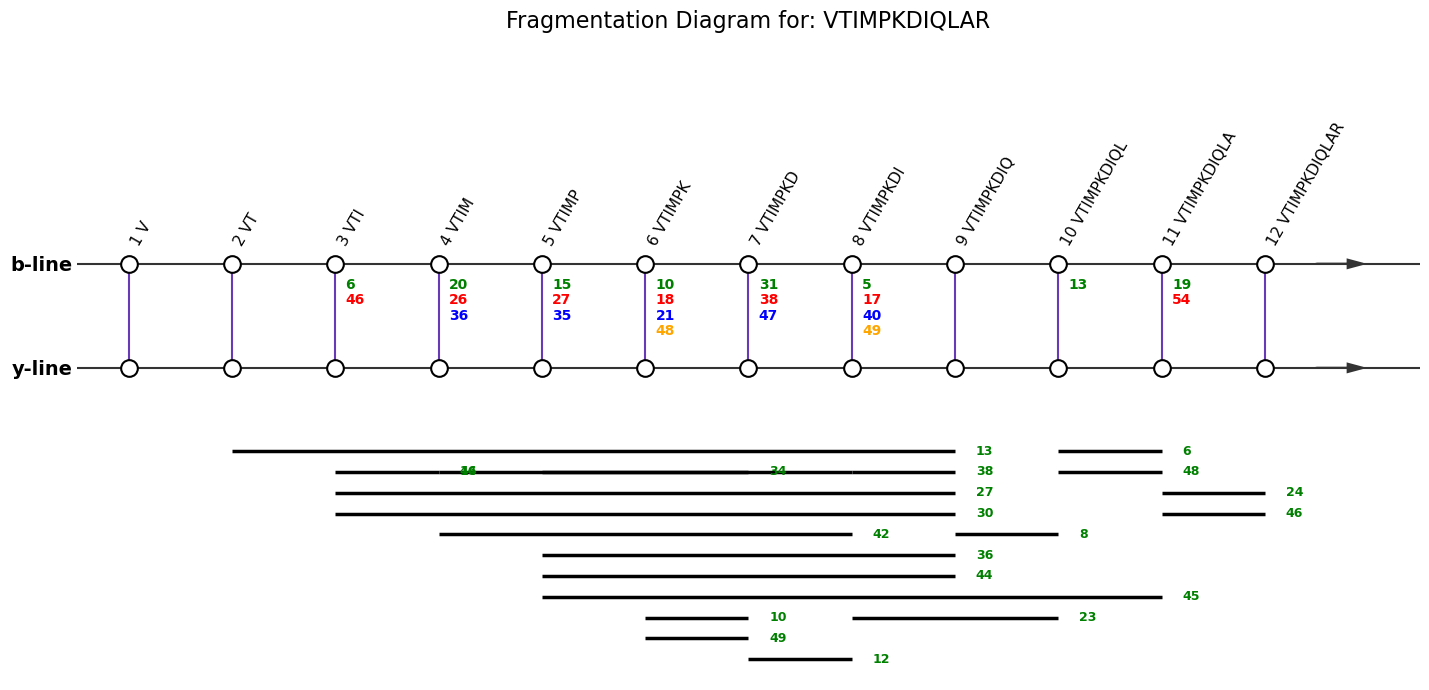

In [8]:
import matplotlib.pyplot as plt
import re

def parse_sequence(sequence):
    """
    Parses a peptide sequence that may contain modified residues.
    """
    residues = re.findall('[A-Z][a-z]*', sequence)
    return residues

def generate_b_ion_fragments(residues):
    """
    Generates a list of cumulative b-ion fragment sequences from the N-terminus.
    """
    fragments = []
    current_fragment = ""
    for residue in residues:
        current_fragment += residue
        fragments.append(current_fragment)
    return fragments

def plot_peptide_fragmentation(sequence, annotations=None, internal_peptides=None, show=True, save_path=None):
    """
    Generates and displays a visualization of peptide fragmentation with improved
    layout for internal peptide annotations.

    Args:
        sequence (str): The peptide sequence to visualize.
        annotations (list of lists, optional): Annotations for the vertical lines.
        internal_peptides (list of tuples, optional): Data for internal peptide lines.
                                                      Format: [(start, end, label), ...].
        show (bool): Whether to display the plot.
        save_path (str, optional): Path to save the figure.
    """
    residues = parse_sequence(sequence)
    b_ion_fragments = generate_b_ion_fragments(residues)
    num_fragments = len(residues)

    annotation_colors = ['green', 'red', 'blue', 'orange', 'purple', 'brown', 'black']

    # --- MODIFIED: Increased figure height for more vertical space ---
    fig, ax = plt.subplots(figsize=(max(12, num_fragments * 1.2), 7))
    y_b_line = 1.0
    y_y_line = 0.0
    line_color = '#333333'
    line_width = 1.5

    # --- Drawing main b/y lines and arrows (unchanged) ---
    ax.axhline(y=y_b_line, color=line_color, lw=line_width, zorder=1)
    ax.axhline(y=y_y_line, color=line_color, lw=line_width, zorder=1)
    arrow_length = 0.3
    ax.arrow(num_fragments + 0.5, y_b_line, arrow_length, 0,
             head_width=0.08, head_length=0.15, fc=line_color, ec=line_color, lw=line_width, zorder=1)
    ax.arrow(num_fragments + 0.5, y_y_line, arrow_length, 0,
             head_width=0.08, head_length=0.15, fc=line_color, ec=line_color, lw=line_width, zorder=1)

    # --- Drawing vertical fragment lines and annotations (unchanged) ---
    for i, fragment in enumerate(b_ion_fragments):
        x_pos = i + 1
        ax.plot([x_pos, x_pos], [y_y_line, y_b_line], color='#673ab7', lw=1.5, zorder=2)
        ax.plot(x_pos, y_b_line, 'o', ms=12, markerfacecolor='white', markeredgecolor='black', markeredgewidth=1.5, zorder=3)
        ax.plot(x_pos, y_y_line, 'o', ms=12, markerfacecolor='white', markeredgecolor='black', markeredgewidth=1.5, zorder=3)
        label_text = f"{i+1} {fragment}"
        ax.text(x_pos, y_b_line + 0.15, label_text, ha='left', va='bottom', rotation=60, fontsize=11)

        if annotations and i < len(annotations) and annotations[i]:
            y_text_start = y_b_line - 0.2
            y_text_step = 0.15
            for j, annotation_val in enumerate(annotations[i]):
                color = annotation_colors[j % len(annotation_colors)]
                y_text = y_text_start - (j * y_text_step)
                ax.text(x_pos + 0.1, y_text, str(annotation_val), ha='left', va='center', color=color, fontsize=10, fontweight='bold')

    # --- NEW: Improved logic for plotting internal peptides ---
    if internal_peptides:
        y_internal_start = -0.5  # Starting y-position for the first lane
        y_internal_step = -0.2   # Vertical distance between lanes
        
        # Tracks the ending x-coordinate of the last peptide in each lane.
        # Initialize with a low value. Max 20 lanes supported.
        lane_ends = [-1.0] * 20

        # Sort peptides by start position, then by length, for better packing
        sorted_peptides = sorted(internal_peptides, key=lambda p: (p[0], p[1] - p[0]))

        for start, end, label in sorted_peptides:
            placed = False
            # Find the first available lane where the new peptide doesn't overlap
            for i in range(len(lane_ends)):
                # Check for space (add a small 0.5 gap for clarity)
                if start > lane_ends[i] + 0.5:
                    y_pos = y_internal_start + (i * y_internal_step - 0.3)
                    
                    # Draw the horizontal line for the internal peptide
                    ax.plot([start, end], [y_pos, y_pos], color='black', linewidth=2.5, solid_capstyle='butt')
                    
                    # Add the label number at the end of the line
                    ax.text(end + 0.2, y_pos, str(label), ha='left', va='center', color='green', fontsize=9, fontweight='bold')
                    
                    # Update the end position for this lane
                    lane_ends[i] = float(end)
                    placed = True
                    break
            
            if not placed:
                print(f"Warning: Could not place internal peptide {label} ({start}-{end}). Consider increasing max lanes.")

    # --- MODIFIED: Adjust plot limits and appearance ---
    ax.set_xlim(0.5, num_fragments + 1.5)
    ax.set_ylim(-3.0, 3.0) # Expanded y-limits
    ax.set_yticks([y_y_line, y_b_line])
    ax.set_yticklabels(['y-line', 'b-line'], fontsize=14, fontweight='bold')
    ax.set_xticks([])
    for spine in ['top', 'right', 'bottom', 'left']:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis='y', length=0)
    plt.title(f'Fragmentation Diagram for: {sequence}', fontsize=16, pad=20)
    plt.tight_layout()

    if show:
        plt.show()

    if save_path is not None:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')


# --- Example Usage (using data from your image) ---
if __name__ == '__main__':
    peptide_sequence = "VTIMPKDIQLAR"

    # Annotations for the vertical b/y lines
    custom_annotations = [
        [], [], ['6', '46'], ['20', '26', '36'], ['15', '27', '35'], ['10', '18', '21', '48'],
        ['31', '38', '47'], ['5', '17', '40', '49'], [], ['13'], ['19', '54'], []
    ]

    # Internal peptide data: list of (start_residue, end_residue, label)
    # I've estimated these from your provided image
    '''
    internal_peptides_data = [
        (5, 7, '2'), (5, 10, '4'), (5, 9, '7'), (5, 11, '11'),
        (5, 12, '16'), (6, 12, '23'), (6, 11, '25'), (7, 8, '28'),
        (7, 10, '29'), (8, 11, '30'), (10, 12, '32'), (9, 10, '34'),
        (9, 11, '37'), (8, 10, '40'), (8, 9, '47'), (4, 5, '51'),
        (11, 12, '52'), (10, 11, '56'), (11, 12, '39') # Added 39
    ]
    '''

    
    internal_peptides_data = [(10, 11, 6), (9, 10, 8), (6, 7, 10), (7, 8, 12), (2, 9, 13), (8, 4, 16), (8, 10, 23), (11, 12, 24), (3, 9, 27), (3, 9, 30), (5, 7, 34), (5, 9, 36), (8, 9, 38), (4, 8, 42), (5, 9, 44), (3, 4, 44), (5, 11, 45), (11, 12, 46), (10, 11, 48), (6, 7, 49)]
    plot_peptide_fragmentation(
        peptide_sequence,
        annotations=custom_annotations,
        internal_peptides=internal_peptides_data
    )

In [9]:
pd.read_csv('data/cluster/data_cluster7.csv', index_col=0)

,Cluster ID,Cluster Size,Median Mass (Da),Difference from Actual Mass (Da)
0,0,8,1253.215,-0.27328
1,1,4,1155.270,-98.21828
2,2,8,1235.365,-18.12328
3,3,2,1217.560,-35.92828
4,4,4,1137.625,-115.86328
5,5,2,1216.720,-36.76828
